In [1]:
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [14]:
from cycler import cycler

In [247]:
colormap = plt.cm.nipy_spectral
# colormap = plt.cm.gist_rainbow
# colormap = plt.cm.prism
# plt.rc('axes', prop_cycle=(cycler(color=[colormap(i) for i in np.linspace(0, 1, 4)])*cycler(linestyle=['-', '--', ':', '-.'])))
plt.rc('axes', prop_cycle=(cycler(color=[colormap(i) for i in np.linspace(0, 1, 7)])*cycler(linestyle=['-', ':'])))

# plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
#                            cycler(linestyle=['-', '--', ':', '-.'])))


In [23]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.rc('axes', prop_cycle=(cycler(color=colors)))


In [24]:
print([x for x in cycler(color=colors)*cycler(linestyle=['-', ':'])])

[{'color': '#1f77b4', 'linestyle': '-'}, {'color': '#1f77b4', 'linestyle': ':'}, {'color': '#1f77b4', 'linestyle': '-'}, {'color': '#1f77b4', 'linestyle': ':'}, {'color': '#ff7f0e', 'linestyle': '-'}, {'color': '#ff7f0e', 'linestyle': ':'}, {'color': '#ff7f0e', 'linestyle': '-'}, {'color': '#ff7f0e', 'linestyle': ':'}, {'color': '#2ca02c', 'linestyle': '-'}, {'color': '#2ca02c', 'linestyle': ':'}, {'color': '#2ca02c', 'linestyle': '-'}, {'color': '#2ca02c', 'linestyle': ':'}, {'color': '#d62728', 'linestyle': '-'}, {'color': '#d62728', 'linestyle': ':'}, {'color': '#d62728', 'linestyle': '-'}, {'color': '#d62728', 'linestyle': ':'}, {'color': '#9467bd', 'linestyle': '-'}, {'color': '#9467bd', 'linestyle': ':'}, {'color': '#9467bd', 'linestyle': '-'}, {'color': '#9467bd', 'linestyle': ':'}, {'color': '#8c564b', 'linestyle': '-'}, {'color': '#8c564b', 'linestyle': ':'}, {'color': '#8c564b', 'linestyle': '-'}, {'color': '#8c564b', 'linestyle': ':'}, {'color': '#e377c2', 'linestyle': '-'},

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['font.size'] = 16

In [4]:
def extract_data(filename):
    with open(filename) as f:
        fiter = iter(f)
        data_rss = []
        data_vsize = []
        evt_nums = []
        evt_times = []
        while True:
            try:
                line = next(fiter)
                if "%MSG-w MemoryCheck:  PostModuleEvent" in line:
                    parts = line.split()
                    ind = parts.index("PostModuleEvent")
                    evt_times.append(datetime.strptime(" ".join(parts[ind+1:ind+3]), "%d-%b-%Y %H:%M:%S"))
                    evt_nums.append(parts[-1])
                    line = next(fiter)
                    if "MemoryCheck: event" not in line:
                        raise RuntimeError("Bad line?")
                    parts = line.split()
                    ind = parts.index("VSIZE")
                    data_vsize.append(float(parts[ind+1]))
                    ind = parts.index("RSS")
                    data_rss.append(float(parts[ind+1]))
                    
            except StopIteration:
                break
    return np.array(evt_nums), evt_times, np.array(data_vsize), np.array(data_rss)

In [28]:
evt_nums_ref, evt_times_ref, data_vsize_ref, data_rss_ref = extract_data("2018ref.txt")

In [7]:
evt_nums_all, evt_times_all, data_vsize_all, data_rss_all = extract_data("2018allConstit.txt")

In [8]:
evt_nums_allfix, evt_times_allfix, data_vsize_allfix, data_rss_allfix = extract_data("2018allConstitFix.txt")

In [9]:
evt_nums_allfix_big, evt_times_allfix_big, data_vsize_allfix_big, data_rss_allfix_big = extract_data("2018allConstitFix20000.txt")

In [10]:
evt_nums_singlemu, evt_times_singlemu, data_vsize_singlemu, data_rss_singlemu = extract_data("2016v3singlemu2K.txt")

In [11]:
evt_nums_builtin, evt_times_builtin, data_vsize_builtin, data_rss_builtin = extract_data("2018MCallConstit.txt")

In [12]:
evt_nums_jetht, evt_times_jetht, data_vsize_jetht, data_rss_jetht = extract_data("2018jetHT.txt")

In [13]:
evt_nums_jec, evt_times_jec, data_vsize_jec, data_rss_jec = extract_data("jec.txt")

In [14]:
print(evt_times_ref[0], data_vsize_ref[0], len(data_vsize_ref))

2019-03-11 15:44:22 2015.18 1999


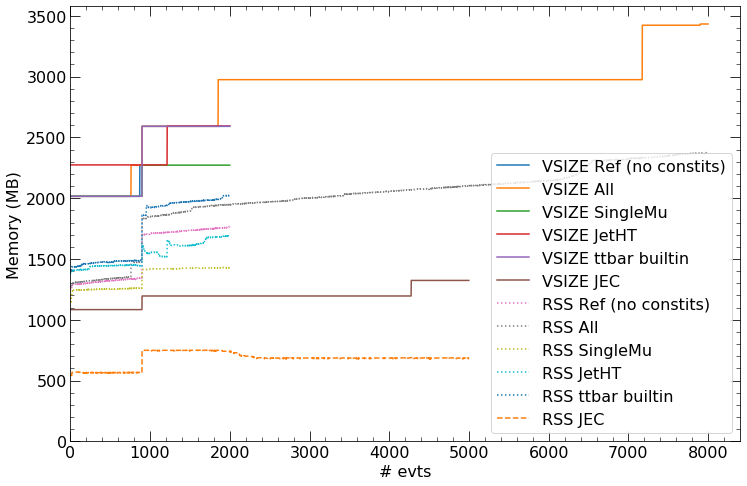

In [15]:
plt.gca().plot(data_vsize_ref, label="VSIZE Ref (no constits)")
# plt.gca().plot(data_vsize_all, label="VSIZE All")
# plt.gca().plot(data_vsize_allfix, label="VSIZE All + fix")
plt.gca().plot(data_vsize_allfix_big, label="VSIZE All")
plt.gca().plot(data_vsize_singlemu, label="VSIZE SingleMu")
plt.gca().plot(data_vsize_jetht, label="VSIZE JetHT")
plt.gca().plot(data_vsize_builtin, label="VSIZE ttbar builtin")
plt.gca().plot(data_vsize_jec, label="VSIZE JEC")

plt.plot(data_rss_ref, label="RSS Ref (no constits)", linestyle='dotted')
# plt.gca().plot(data_rss_all, label="RSS All", linestyle='dotted')
# plt.gca().plot(data_rss_allfix, label="RSS All + fix", linestyle='dotted')
plt.gca().plot(data_rss_allfix_big, label="RSS All", linestyle='dotted')
plt.gca().plot(data_rss_singlemu, label="RSS SingleMu", linestyle='dotted')
plt.gca().plot(data_rss_jetht, label="RSS JetHT", linestyle='dotted')
plt.gca().plot(data_rss_builtin, label="RSS ttbar builtin", linestyle='dotted')
plt.gca().plot(data_rss_jec, label="RSS JEC", linestyle='dashed')


plt.gca().minorticks_on()
plt.gca().tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
plt.gca().tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# plt.gca().tick_params(which='minor', length=20, direction='in', width=2)
plt.legend();
plt.xlabel("# evts");
plt.ylabel("Memory (MB)");
plt.xlim(left=0);
plt.ylim(bottom=0);

In [5]:
def make_time_diffs(times):
    tdiffs = [x - times[0] for x in times]
    return [x.seconds + x.microseconds/1000000. for x in tdiffs]
    

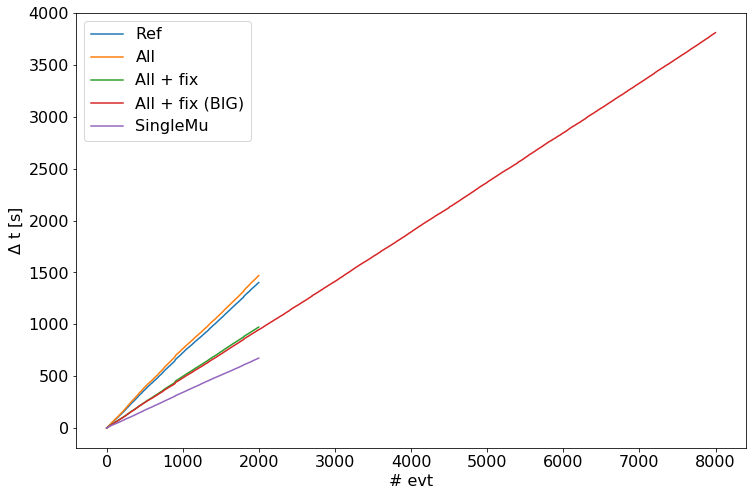

In [17]:
tdiffs_ref = make_time_diffs(evt_times_ref)
tdiffs_all = make_time_diffs(evt_times_all)
tdiffs_allfix = make_time_diffs(evt_times_allfix)
tdiffs_allfix_big = make_time_diffs(evt_times_allfix_big)
tdiffs_singlemu = make_time_diffs(evt_times_singlemu)

plt.plot(tdiffs_ref, label="Ref")
plt.plot(tdiffs_all, label="All")
plt.plot(tdiffs_allfix, label="All + fix")
plt.plot(tdiffs_allfix_big, label="All + fix (BIG)")
plt.plot(tdiffs_singlemu, label="SingleMu")

plt.xlabel("# evt");
plt.ylabel("$\Delta$ t [s]");
plt.legend();

Trying to use psrecord:

In [18]:
from collections import defaultdict

In [19]:
psrecord_log = defaultdict(list)
with open("activity.txt") as f:
    for line in f:
        if line.startswith('#'):
            continue
        parts = line.strip().split()
        time, cpu, real, virtual = [float(p) for p in parts]
        psrecord_log['time'].append(time)
        psrecord_log['cpu'].append(cpu)
        psrecord_log['real'].append(real)
        psrecord_log['virtual'].append(virtual)

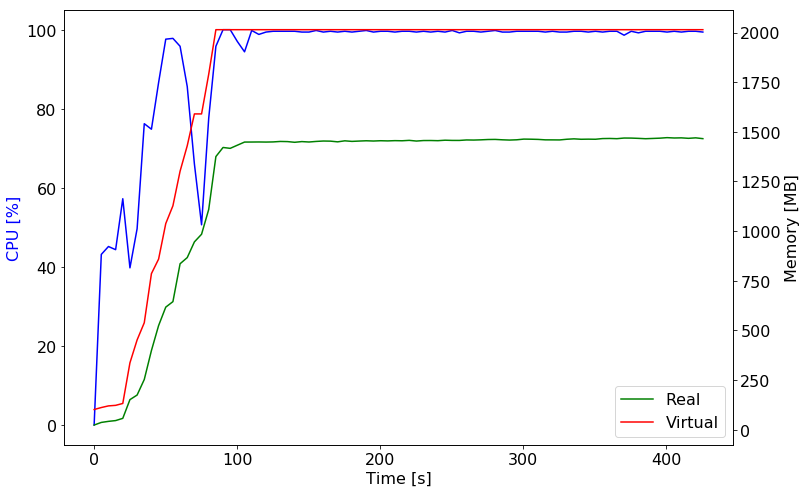

In [20]:
fig, ax1 = plt.subplots()
ax1.plot(psrecord_log['time'], psrecord_log['cpu'], label='CPU', color='blue')
ax1.set_ylabel('CPU [%]', color='blue');
ax1.set_xlabel('Time [s]');
ax2 = ax1.twinx();
ax2.plot(psrecord_log['time'], psrecord_log['real'], label='Real', color='green')
ax2.plot(psrecord_log['time'], psrecord_log['virtual'], label='Virtual', color='red')
ax2.set_ylabel('Memory [MB]')
plt.legend(loc='lower right');

In [21]:
print(psrecord_log['time'][-1], psrecord_log['virtual'][-1], psrecord_log['real'][-1])

425.475 2014.191 1465.668


# Proper analysis on 2018 MC/data turning on/off bits

In [6]:
_, evt_times_mc_all, data_vsize_mc_all, data_rss_mc_all = extract_data("mc2018_all_constits_all_25k.txt")
_, evt_times_mc_noConstit, data_vsize_mc_noConstit, data_rss_mc_noConstit = extract_data("mc2018_no_constits.txt")
_, evt_times_mc_noPhotons, data_vsize_mc_noPhotons, data_rss_mc_noPhotons = extract_data("mc2018_all_constits_noPhotons.txt")
_, evt_times_mc_noECF, data_vsize_mc_noECF, data_rss_mc_noECF = extract_data("mc2018_all_constits_noECF.txt")
_, evt_times_mc_noECFNSubjettiness, data_vsize_mc_noECFNSubjettiness, data_rss_mc_noECFNSubjettiness = extract_data("mc2018_all_constits_noECFNSubjettiness.txt")
_, evt_times_mc_compactPruning, data_vsize_mc_compactPruning, data_rss_mc_compactPruning = extract_data("mc2018_all_constits_compactPruning.txt")
_, evt_times_mc_nonCompactPruning, data_vsize_mc_nonCompactPruning, data_rss_mc_nonCompactPruning = extract_data("mc2018_all_constits_nonCompactPruning.txt")
_, evt_times_mc_compactPruning2, data_vsize_mc_compactPruning2, data_rss_mc_compactPruning2 = extract_data("mc2018_all_constits_compactPruning2.txt")
_, evt_times_mc_noXConeHOTVR, data_vsize_mc_noXConeHOTVR, data_rss_mc_noXConeHOTVR = extract_data("mc2018_all_constits_noXConeHOTVR.txt")
_, evt_times_mc_noDeepAK8, data_vsize_mc_noDeepAK8, data_rss_mc_noDeepAK8 = extract_data("mc2018_all_constits_noDeepAK8.txt")
_, evt_times_mc_noHiggsTag, data_vsize_mc_noHiggsTag, data_rss_mc_noHiggsTag = extract_data("mc2018_all_constits_noHiggsTag.txt")
_, evt_times_mc_noJets, data_vsize_mc_noJets, data_rss_mc_noJets = extract_data("mc2018_all_constits_noJets.txt")
_, evt_times_mc_noGenJets, data_vsize_mc_noGenJets, data_rss_mc_noGenJets = extract_data("mc2018_all_constits_noGenJets.txt")
_, evt_times_mc_noGenInfo, data_vsize_mc_noGenInfo, data_rss_mc_noGenInfo = extract_data("mc2018_all_constits_noGenInfo.txt")
# _, evt_times_mc_noTopJetsJECJets, data_vsize_mc_noTopJetsJECJets, data_rss_mc_noTopJetsJECJets = extract_data("mc2018_all_constits_noTopJetsJECJets.txt")
_, evt_times_mc_noTopJetsJECJets, data_vsize_mc_noTopJetsJECJets, data_rss_mc_noTopJetsJECJets = extract_data("mc2018_all_constits_noTopJetsJECJets_5k.txt")
_, evt_times_mc_noTopJetsJECJetsNoGenTopJets, data_vsize_mc_noTopJetsJECJetsNoGenTopJets, data_rss_mc_noTopJetsJECJetsNoGenTopJets = extract_data("mc2018_all_constits_noTopJetsJECJetsNoGenTopJets_5k.txt")
_, evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone, data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone, data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone = extract_data("mc2018_all_constits_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone_5k.txt")
_, evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso = extract_data("mc2018_all_constits_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso_5k.txt")
_, evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate, data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate, data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate = extract_data("mc2018_all_constits_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate_5k.txt")
_, evt_times_mc_bare, data_vsize_mc_bare, data_rss_mc_bare = extract_data("mc2018_all_constits_bare_5k.txt")
_, evt_times_mc_noGenTopJets, data_vsize_mc_noGenTopJets, data_rss_mc_noGenTopJets = extract_data("mc2018_all_constits_noGenTopJets_5k.txt")
_, evt_times_mc_JECAK8pt20, data_vsize_mc_JECAK8pt20, data_rss_mc_JECAK8pt20 = extract_data("mc2018_all_constits_JECAK8pt20.txt")
_, evt_times_mc_noL1seeds, data_vsize_mc_noL1seeds, data_rss_mc_noL1seeds = extract_data("mc2018_all_constits_noL1seeds.txt")
_, evt_times_mc_tFileService, data_vsize_mc_tFileService, data_rss_mc_tFileService = extract_data("mc2018_all_constits_tFileService.txt")

In [6]:
_, evt_times_mc_all_new, data_vsize_mc_all_new, data_rss_mc_all_new = extract_data("mc2018_all_constits_new_all_naf16.txt")
_, evt_times_mc_all_new2, data_vsize_mc_all_new2, data_rss_mc_all_new2 = extract_data("mc2018_all_constits_new_all_naf16_2.txt")
_, evt_times_mc_dropInputs_new, data_vsize_mc_dropInputs_new, data_rss_mc_dropInputs_new = extract_data("mc2018_all_constits_new_dropInputs_naf16.txt")

In [6]:
_, evt_times_data_jetht, data_vsize_data_jetht, data_rss_data_jetht = extract_data("data_jetht_18_noConstit_10K.txt")
_, evt_times_mc_10k, data_vsize_mc_10k, data_rss_mc_10k = extract_data("mc_ttbar_18_constit_10K.txt")
_, evt_times_mc_noConstit_5k, data_vsize_mc_noConstit_5k, data_rss_mc_noConstit_5k = extract_data("mc_ttbar_18_noConstit_5K.txt")
_, evt_times_mc_constit_GenTopJetsAsGenJets, data_vsize_mc_constit_GenTopJetsAsGenJets, data_rss_mc_constit_GenTopJetsAsGenJets = extract_data("mc_ttbar_18_consit_GenTopJetsAsGenJets_XConeHOTVRGenTopJets.txt")
_, evt_times_mc_constit_NoGenHOTVRXcone, data_vsize_mc_constit_NoGenHOTVRXcone, data_rss_mc_constit_NoGenHOTVRXcone = extract_data("mc_ttbar_18_constit_NoGenHOTVRXcone.txt")
_, evt_times_mc_constit_NoStoreGenHOTVRXcone, data_vsize_mc_constit_NoStoreGenHOTVRXcone, data_rss_mc_constit_NoStoreGenHOTVRXcone = extract_data("mc_ttbar_18_consit_NoStoreGenHOTVRXCone.txt")
_, evt_times_mc_constit_NoStoreGenXcone_NoGenHOTVR, data_vsize_mc_constit_NoStoreGenXcone_NoGenHOTVR, data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR = extract_data("mc_ttbar_18_consit_NoStoreGenXCone_NoGenHOTVR.txt")
_, evt_times_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix, data_vsize_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix, data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix = extract_data("mc_ttbar_18_consit_NoStoreGenXCone_NoGenHOTVR_ptrFix.txt")
_, evt_times_mc_constit_NoStoreGenHOTVR_NoGenXcone, data_vsize_mc_constit_NoStoreGenHOTVR_NoGenXcone, data_rss_mc_constit_NoStoreGenHOTVR_NoGenXcone = extract_data("mc_ttbar_18_consit_NoStoreGenHOTVR_NoGenXCone.txt")
_, evt_times_mc_constit_ptrFix, data_vsize_mc_constit_ptrFix, data_rss_mc_constit_ptrFix = extract_data("mc_ttbar_18_consit_ptrFix_5k.txt")

_, evt_times_dy_mc_10k, data_vsize_dy_mc_10k, data_rss_dy_mc_10k = extract_data("mc_dy_18_noConstit_10K.txt")
_, evt_times_mc_asData_5k, data_vsize_mc_asData_5k, data_rss_mc_asData_5k = extract_data("mc_ttbar_18_asData.txt")


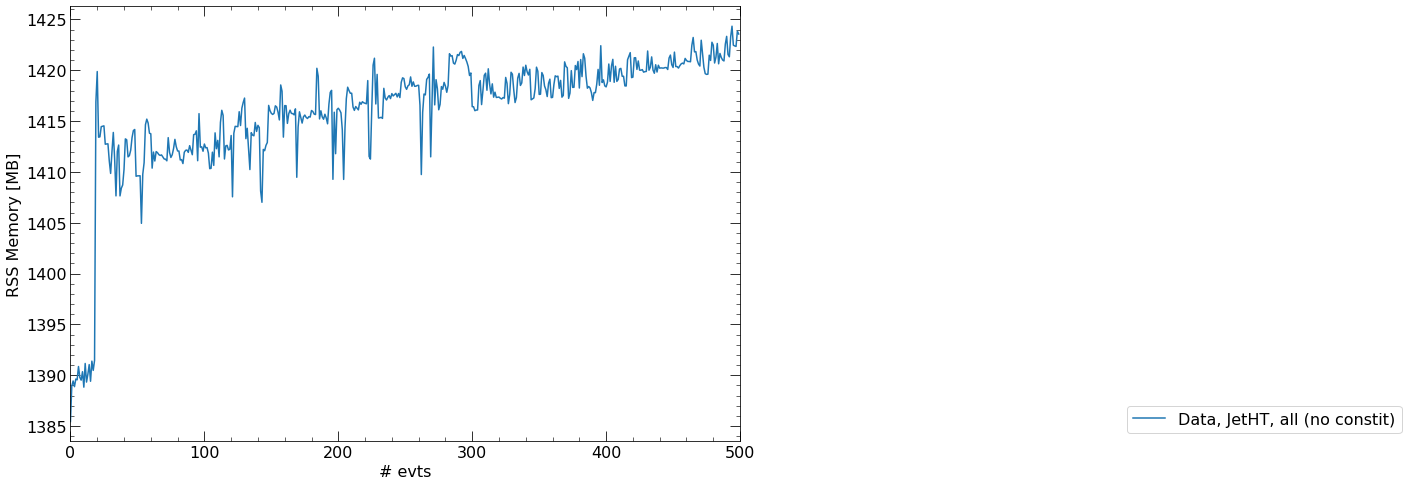

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(data_rss_data_jetht[:500], label="Data, JetHT, all (no constit)")
# ax1.plot(data_rss_mc_10k, label="ttbar MC, all (incl. constit)")
# ax1.plot(data_rss_mc_noConstit_5k[:500], label="ttbar MC, all (no. constit)")
# ax1.plot(data_rss_mc_asData_5k, label="ttbar MC, all (no. constit, as data)")
# ax1.plot(data_rss_mc_constit_GenTopJetsAsGenJets, label="ttbar MC, all (constit, GenTopJets as GenJets, normal GenHOTVR/GenXCone)")
# ax1.plot(data_rss_mc_constit_NoGenHOTVRXcone, label="ttbar MC, all (constit, no GenHOTVR/GenXCone)")
# ax1.plot(data_rss_mc_constit_NoStoreGenHOTVRXcone, label="ttbar MC, all (constit, run but no storing GenHOTVR/GenXCone)")
# ax1.plot(data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR, label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR)")
# ax1.plot(data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix, label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR, ptr fix)")
# ax1.plot(data_rss_mc_constit_ptrFix, label="ttbar MC, all (constit, ptr fix)")
# ax1.plot(data_rss_mc_constit_NoStoreGenHOTVR_NoGenXcone, label="ttbar MC, all (constit, run but no storing GenHOTVR, no GenXCone)")
# ax1.plot(data_rss_dy_mc_10k, label="DY MC, all (incl. constit)")
# ax1.plot(data_rss_mc_all, label="MC, All (incl. constit)")
# ax1.plot(data_rss_mc_all_new, label="MC, All new (incl. constit)")
# ax1.plot(data_rss_mc_all_new2, label="MC, All new2 (incl. constit)")
# ax1.plot(data_rss_mc_dropInputs_new, label="MC, dropInputs")
# ax1.plot(data_rss_mc_noConstit, label="MC, No jet constit")
# ax1.plot(data_rss_mc_noPhotons, label="MC, No photons")
# ax1.plot(data_rss_mc_noECF, label="MC, No ECF")
# ax1.plot(data_rss_mc_noECFNSubjettiness, label="MC, No ECF+NSubjettiness")
# ax1.plot(data_rss_mc_nonCompactPruning, label="MC, All (incl. constit)2")
# ax1.plot(data_rss_mc_compactPruning, label="MC, compact pruning")
# ax1.plot(data_rss_mc_compactPruning2, label="MC, compact pruning2")
# ax1.plot(data_rss_mc_noL1seeds, label="MC, no L1 seeds")
# ax1.plot(data_rss_mc_tFileService, label="MC, TFileService")
# ax1.plot(data_rss_mc_JECAK8pt20, label="MC, JEC AK8 pt > 20")
# ax1.plot(data_rss_mc_noXConeHOTVR, label="MC, No XCone/HOTVR")
# ax1.plot(data_rss_mc_noDeepAK8, label="MC, No DeepAK8")
# ax1.plot(data_rss_mc_noHiggsTag, label="MC, No HiggsTag")
# ax1.plot(data_rss_mc_noJets, label="MC, No Jets")
# ax1.plot(data_rss_mc_noGenJets, label="ttbar MC, No GenJets")
# ax1.plot(data_rss_mc_noGenTopJets, label="ttbar MC, No GenTopJets")
# ax1.plot(data_rss_mc_noGenInfo, label="ttbar MC, No GenInfo")
# ax1.plot(data_rss_mc_noTopJetsJECJets, label="MC, No TopJets+JECJets")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJets, label="MC, No TopJets+JECJets+GenTopJets")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso+JetUpdate")
# ax1.plot(data_rss_mc_bare, label="MC, bare minimum")

ax1.minorticks_on()
ax1.tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
ax1.tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# ax1.tick_params(which='minor', length=20, direction='in', width=2)
ax1.legend(loc='lower right', bbox_to_anchor=(2, 0));
ax1.set_xlabel("# evts");
ax1.set_ylabel("RSS Memory [MB]");
ax1.set_xlim(left=0, right=500); #, right=5000);
# plt.ylim(bottom=0);
# ax1.set_ylim(top=1430, bottom=1380)

(0, 10497.9)

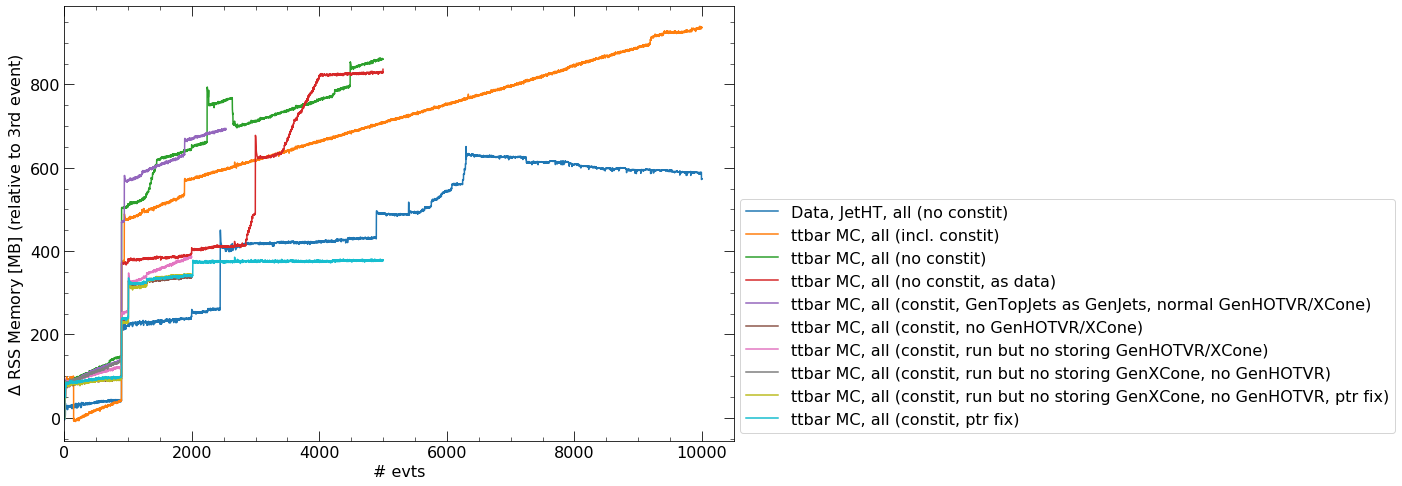

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(data_rss_data_jetht-data_rss_data_jetht[0], label="Data, JetHT, all (no constit)")
ax1.plot(data_rss_mc_10k-data_rss_mc_10k[0], label="ttbar MC, all (incl. constit)")
ax1.plot(data_rss_mc_noConstit_5k-data_rss_mc_noConstit_5k[0], label="ttbar MC, all (no constit)")
ax1.plot(data_rss_mc_asData_5k-data_rss_mc_asData_5k[0], label="ttbar MC, all (no constit, as data)")
ax1.plot(data_rss_mc_constit_GenTopJetsAsGenJets-data_rss_mc_constit_GenTopJetsAsGenJets[0], label="ttbar MC, all (constit, GenTopJets as GenJets, normal GenHOTVR/XCone)")
ax1.plot(data_rss_mc_constit_NoGenHOTVRXcone-data_rss_mc_constit_NoGenHOTVRXcone[0], label="ttbar MC, all (constit, no GenHOTVR/XCone)")
ax1.plot(data_rss_mc_constit_NoStoreGenHOTVRXcone-data_rss_mc_constit_NoStoreGenHOTVRXcone[0], label="ttbar MC, all (constit, run but no storing GenHOTVR/XCone)")
ax1.plot(data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR-data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR[0], label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR)")
ax1.plot(data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix-data_rss_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix[0], label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR, ptr fix)")
ax1.plot(data_rss_mc_constit_ptrFix-data_rss_mc_constit_ptrFix[0], label="ttbar MC, all (constit, ptr fix)")
# ax1.plot(data_rss_mc_constit_NoStoreGenHOTVR_NoGenXcone-data_rss_mc_constit_NoStoreGenHOTVR_NoGenXcone[0], label="ttbar MC, all (constit, run but no storing GenHOTVR, no GenXCone)")
# ax1.plot(data_rss_dy_mc_10k-data_rss_dy_mc_10k[0], label="DY MC, all (incl. constit)")
# ax1.plot(data_rss_mc_all-data_rss_mc_all[0], label="MC, All (incl. constit)")
# ax1.plot(data_rss_mc_all_new-data_rss_mc_all_new[0], label="MC, All new (incl. constit)")
# ax1.plot(data_rss_mc_all_new2-data_rss_mc_all_new2[0], label="MC, All new2 (incl. constit)")
# ax1.plot(data_rss_mc_dropInputs_new-data_rss_mc_dropInputs_new[0], label="MC, dropInputs")
# ax1.plot(data_rss_mc_noConstit-data_rss_mc_noConstit[0], label="MC, No jet constit")
# ax1.plot(data_rss_mc_noPhotons-data_rss_mc_noPhotons[0], label="MC, No photons")
# ax1.plot(data_rss_mc_noECF-data_rss_mc_noECF[0], label="MC, No ECF")
# ax1.plot(data_rss_mc_noECFNSubjettiness-data_rss_mc_noECFNSubjettiness[0], label="MC, No ECF+NSubjettiness")
# ax1.plot(data_rss_mc_nonCompactPruning-data_rss_mc_nonCompactPruning[0], label="MC, All (incl. constit)2")
# ax1.plot(data_rss_mc_compactPruning-data_rss_mc_compactPruning[0], label="MC, compact pruning")
# ax1.plot(data_rss_mc_compactPruning2-data_rss_mc_compactPruning2[0], label="MC, compact pruning2")
# ax1.plot(data_rss_mc_noL1seeds-data_rss_mc_noL1seeds[0], label="MC, no L1 seeds")
# ax1.plot(data_rss_mc_tFileService-data_rss_mc_tFileService[0], label="MC, TFileService")
# ax1.plot(data_rss_mc_JECAK8pt20-data_rss_mc_JECAK8pt20[0], label="MC, JEC AK8 pt > 20")
# ax1.plot(data_rss_mc_noXConeHOTVR-data_rss_mc_noXConeHOTVR[0], label="MC, No XCone/HOTVR")
# ax1.plot(data_rss_mc_noDeepAK8-data_rss_mc_noDeepAK8[0], label="MC, No DeepAK8")
# ax1.plot(data_rss_mc_noHiggsTag, label="MC, No HiggsTag")
# ax1.plot(data_rss_mc_noJets-data_rss_mc_noJets[0], label="MC, No Jets")
# ax1.plot(data_rss_mc_noGenJets-data_rss_mc_noGenJets[0], label="ttbar MC, No GenJets")
# ax1.plot(data_rss_mc_noGenTopJets-data_rss_mc_noGenTopJets[0], label="ttbar MC, No GenTopJets")
# ax1.plot(data_rss_mc_noGenInfo-data_rss_mc_noGenInfo[0], label="ttbar MC, No GenInfo")
# ax1.plot(data_rss_mc_noTopJetsJECJets-data_rss_mc_noTopJetsJECJets[0], label="MC, No TopJets+JECJets")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJets-data_rss_mc_noTopJetsJECJetsNoGenTopJets[0], label="MC, No TopJets+JECJets+GenTopJets")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone-data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone[0], label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso")
# ax1.plot(data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate-data_rss_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate[0], label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso+JetUpdate")
# ax1.plot(data_rss_mc_bare, label="MC, bare minimum")

ax1.minorticks_on()
ax1.tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
ax1.tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# ax1.tick_params(which='minor', length=20, direction='in', width=2)
ax1.legend(loc='lower right', bbox_to_anchor=(2, 0));
ax1.set_xlabel("# evts");
ax1.set_ylabel("$\Delta$ RSS Memory [MB] (relative to 3rd event)");
ax1.set_xlim(left=0) #, right=500); #, right=5000);
# plt.ylim(bottom=0);

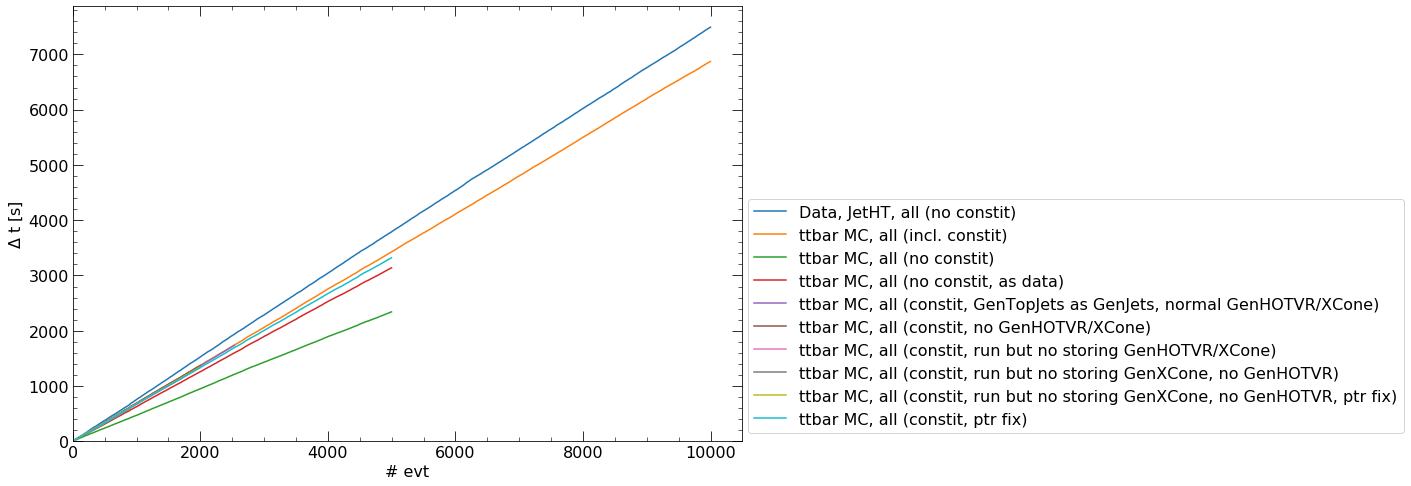

In [7]:
fig, ax1 = plt.subplots()

ax1.plot(make_time_diffs(evt_times_data_jetht), label="Data, JetHT, all (no constit)")
ax1.plot(make_time_diffs(evt_times_mc_10k), label="ttbar MC, all (incl. constit)")
ax1.plot(make_time_diffs(evt_times_mc_noConstit_5k), label="ttbar MC, all (no constit)")
ax1.plot(make_time_diffs(evt_times_mc_asData_5k), label="ttbar MC, all (no constit, as data)")
ax1.plot(make_time_diffs(evt_times_mc_constit_GenTopJetsAsGenJets), label="ttbar MC, all (constit, GenTopJets as GenJets, normal GenHOTVR/XCone)")
ax1.plot(make_time_diffs(evt_times_mc_constit_NoGenHOTVRXcone), label="ttbar MC, all (constit, no GenHOTVR/XCone)")
ax1.plot(make_time_diffs(evt_times_mc_constit_NoStoreGenHOTVRXcone), label="ttbar MC, all (constit, run but no storing GenHOTVR/XCone)")
ax1.plot(make_time_diffs(evt_times_mc_constit_NoStoreGenXcone_NoGenHOTVR), label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR)")
ax1.plot(make_time_diffs(evt_times_mc_constit_NoStoreGenXcone_NoGenHOTVR_ptrFix), label="ttbar MC, all (constit, run but no storing GenXCone, no GenHOTVR, ptr fix)")
ax1.plot(make_time_diffs(evt_times_mc_constit_ptrFix), label="ttbar MC, all (constit, ptr fix)")

# ax1.plot(make_time_diffs(evt_times_dy_mc_10k), label="DY MC, all (no constit)")
# ax1.plot(make_time_diffs(evt_times_mc_all), label="MC, All (incl. constit)")
# ax1.plot(make_time_diffs(evt_times_mc_noConstit), label="MC, No jet constit")
# # ax1.plot(make_time_diffs(evt_times_mc_noPhotons), label="MC, No photons")
# ax1.plot(make_time_diffs(evt_times_mc_noXConeHOTVR), label="MC, No XCone/HOTVR")
# ax1.plot(make_time_diffs(evt_times_mc_noDeepAK8), label="MC, No DeepAK8")
# ax1.plot(make_time_diffs(evt_times_mc_nonCompactPruning), label="MC, non-compact pruning (default)")
# ax1.plot(make_time_diffs(evt_times_mc_compactPruning), label="MC, compact pruning")
# ax1.plot(make_time_diffs(evt_times_mc_compactPruning2), label="MC, compact pruning2")
# ax1.plot(make_time_diffs(evt_times_mc_noHiggsTag), label="MC, No HiggsTag")
# ax1.plot(make_time_diffs(evt_times_mc_noJets), label="MC, No Jets")
# ax1.plot(make_time_diffs(evt_times_mc_noGenJets), label="MC, No GenJets")
# ax1.plot(make_time_diffs(evt_times_mc_noGenInfo), label="MC, No GenInfo")
# ax1.plot(make_time_diffs(evt_times_mc_noTopJetsJECJets), label="MC, No TopJets+JECJets")
# ax1.plot(make_time_diffs(evt_times_mc_noTopJetsJECJetsNoGenTopJets), label="MC, No TopJets+JECJets+GenTopJets")
# ax1.plot(make_time_diffs(evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone), label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone")
# # ax1.plot(make_time_diffs(evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso), label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso")
# ax1.plot(make_time_diffs(evt_times_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate), label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso+JetUpdate")
# ax1.plot(make_time_diffs(evt_times_mc_bare), label="MC, bare minimum")


ax1.minorticks_on()
ax1.tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
ax1.tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# ax1.tick_params(which='minor', length=20, direction='in', width=2)

ax1.legend(loc='lower right', bbox_to_anchor=(2, 0));
ax1.set_xlabel("# evt");
ax1.set_ylabel("$\Delta$ t [s]");

ax1.set_xlim(left=0);
ax1.set_ylim(bottom=0);

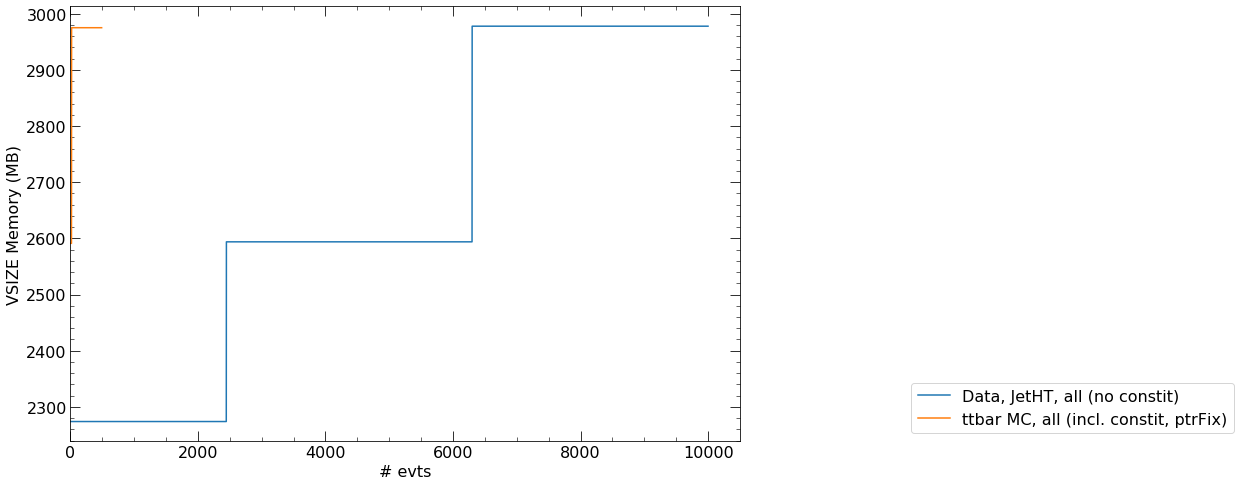

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(data_vsize_data_jetht, label="Data, JetHT, all (no constit)")
ax1.plot(data_vsize_mc_constit_ptrFix, label="ttbar MC, all (incl. constit, ptrFix)")
# ax1.plot(data_vsize_mc_all, label="MC, All (incl. constit)")
# ax1.plot(data_vsize_mc_noConstit, label="MC, No jet constit.")
# # ax1.plot(data_vsize_mc_noPhotons, label="MC, No photons")
# ax1.plot(data_vsize_mc_noECF, label="MC, No ECF")
# ax1.plot(data_vsize_mc_noECFNSubjettiness, label="MC, No ECF+NSubjettiness")
# ax1.plot(data_vsize_mc_nonCompactPruning, label="MC, All (incl. constit)2")
# ax1.plot(data_vsize_mc_compactPruning, label="MC, compact pruning")
# ax1.plot(data_vsize_mc_compactPruning2, label="MC, compact pruning2")
# ax1.plot(data_vsize_mc_tFileService, label="MC, tfileservice")
# ax1.plot(data_vsize_mc_JECAK8pt20-data_vsize_mc_JECAK8pt20[0], label="MC, JEC AK8 pt>20")
# ax1.plot(data_vsize_mc_noXConeHOTVR, label="MC, No XCone/HOTVR")
# ax1.plot(data_vsize_mc_noDeepAK8, label="MC, No DeepAK8")
# # ax1.plot(data_vsize_mc_noHiggsTag, label="MC, No HiggsTag")
# ax1.plot(data_vsize_mc_noJets, label="MC, No Jets")
# ax1.plot(data_vsize_mc_noGenJets, label="MC, No GenJets")
# ax1.plot(data_vsize_mc_noGenTopJets, label="MC, No GenTopJets")
# ax1.plot(data_vsize_mc_noGenInfo, label="MC, No GenInfo")
# ax1.plot(data_vsize_mc_noTopJetsJECJets, label="MC, No TopJets+JECJets")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJets, label="MC, No TopJets+JECJets+GenTopJets")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso+JetUpdate")
# ax1.plot(data_vsize_mc_bare, label="MC, bare minimum")


ax1.minorticks_on()
ax1.tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
ax1.tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# ax1.tick_params(which='minor', length=20, direction='in', width=2)
ax1.legend(loc='lower right', bbox_to_anchor=(1.75, 0));
ax1.set_xlabel("# evts");
ax1.set_ylabel("VSIZE Memory (MB)");
ax1.set_xlim(left=0);
# plt.ylim(bottom=0);

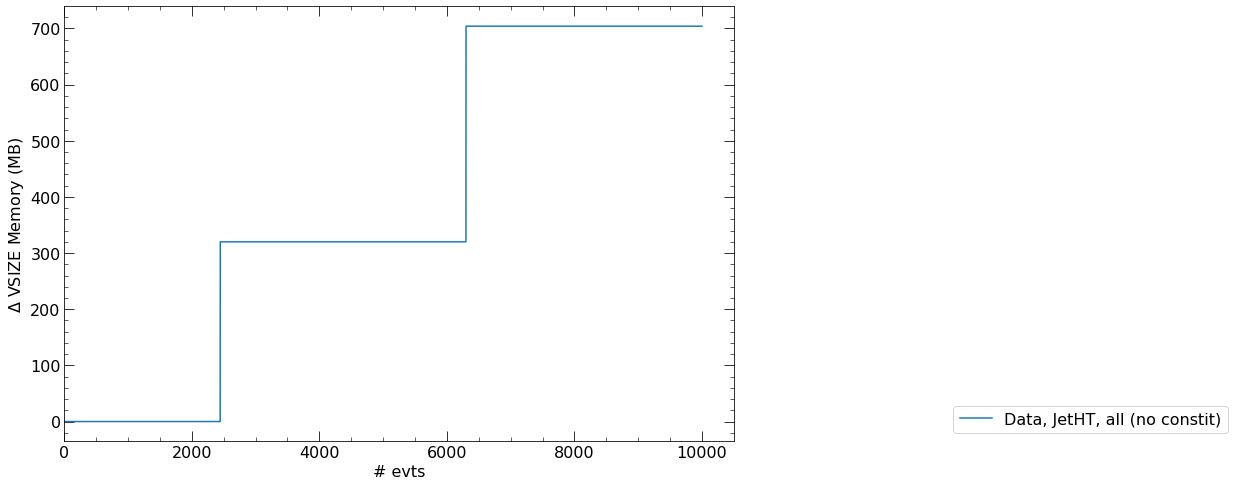

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(data_vsize_data_jetht-data_vsize_data_jetht[0], label="Data, JetHT, all (no constit)")
# ax1.plot(data_vsize_mc_all-data_vsize_mc_all[0], label="MC, All (incl. constit)")
# ax1.plot(data_vsize_mc_noConstit, label="MC, No jet constit.")
# # ax1.plot(data_vsize_mc_noPhotons, label="MC, No photons")
# ax1.plot(data_vsize_mc_noECF, label="MC, No ECF")
# ax1.plot(data_vsize_mc_noECFNSubjettiness, label="MC, No ECF+NSubjettiness")
# ax1.plot(data_vsize_mc_nonCompactPruning-data_vsize_mc_nonCompactPruning[0], label="MC, All (incl. constit)2")
# ax1.plot(data_vsize_mc_compactPruning-data_vsize_mc_compactPruning[0], label="MC, compact pruning")
# ax1.plot(data_vsize_mc_compactPruning2-data_vsize_mc_compactPruning2[0], label="MC, compact pruning2")
# ax1.plot(data_vsize_mc_JECAK8pt20-data_vsize_mc_JECAK8pt20[0], label="MC, JEC AK8 pt>20")
# ax1.plot(data_vsize_mc_noXConeHOTVR, label="MC, No XCone/HOTVR")
# ax1.plot(data_vsize_mc_noDeepAK8, label="MC, No DeepAK8")
# # ax1.plot(data_vsize_mc_noHiggsTag, label="MC, No HiggsTag")
# ax1.plot(data_vsize_mc_noJets, label="MC, No Jets")
# ax1.plot(data_vsize_mc_noGenJets, label="MC, No GenJets")
# ax1.plot(data_vsize_mc_noGenTopJets, label="MC, No GenTopJets")
# ax1.plot(data_vsize_mc_noGenInfo, label="MC, No GenInfo")
# ax1.plot(data_vsize_mc_noTopJetsJECJets, label="MC, No TopJets+JECJets")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJets, label="MC, No TopJets+JECJets+GenTopJets")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXCone, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIso, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso")
# ax1.plot(data_vsize_mc_noTopJetsJECJetsNoGenTopJetsNoHOTVRXConeNoMiniIsoNoJetUpdate, label="MC, No TopJets+JECJets+GenTopJets+HOTVRXCone+MiniIso+JetUpdate")
# ax1.plot(data_vsize_mc_bare, label="MC, bare minimum")


ax1.minorticks_on()
ax1.tick_params(which='major', left=True, bottom=True, top=True, right=True, length=10, direction='in')
ax1.tick_params(which='minor', left=True, bottom=True, top=True, right=True, length=4, direction='in')
# ax1.tick_params(which='minor', length=20, direction='in', width=2)
ax1.legend(loc='lower right', bbox_to_anchor=(1.75, 0));
ax1.set_xlabel("# evts");
ax1.set_ylabel("$\Delta$ VSIZE Memory (MB)");
ax1.set_xlim(left=0);
# plt.ylim(bottom=0);